<a href="https://colab.research.google.com/github/jneey2000/ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- SVM Algorithm 은 기본적으로 두 개의 그룹을 분리하는 방법으로 데이터들과 거리가 가장 먼 초평면 (hyperplane)을 선택하여 분리하는 방법이다.
- margin 이라는 개념으로 등장합니다. margin은 초평면과 가장 가까이 있는 데이터와의 거리를 의미합니다. 이 마진을 최대로 만드는 직선을 계산하여 데이터 분류하는 방법이 SVM의 목표입니다.


Classification

In [1]:
#라이브러리 import #SVM, 마진 최대 목표

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

In [2]:
#기본적인 SVM 모델 적합
#iris 학습용 데이터 사용

iris = load_iris() #붓꽃 데이터셋
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Split : Data set | train set

총 150개 샘플 중 70%, 105개 훈련셋 | 30% 45개 테스트셋


In [4]:
df = pd.DataFrame(data= np.c_[iris.data, iris.target] ,
#np.c_ 는 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들어줌
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [5]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
from sklearn.model_selection import train_test_split
#train, test 데이터셋 분리

In [19]:
X = df[df.columns[:-1]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [20]:
X_train

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [21]:
y_train

,target
114,2.0
136,2.0
53,1.0
19,0.0
38,0.0
...,...
17,0.0
98,1.0
66,1.0
126,2.0


iris data set class : 0,1,2
Setosa, Versicolour, Virginica

In [23]:
print(len(X_train))
print(len(X_test))
X_train.shape, y_train.shape

105
45


((105, 4), (105,))

특성 스케일링(feature scaling)

각 특성마다 값의 범위에 차이가 있기 때문에 SVM 을 훈련하기 전에 특성을 전처리해줘야 합니다.

In [24]:
X_train.max()

,0
sepal length,7.7
sepal width,4.4
petal length,6.9
petal width,2.5


In [25]:
X_train.min()

,0
sepal length,4.4
sepal width,2.2
petal length,1.0
petal width,0.1


feature scaling
1. 정규화(normalization) -
  - 최소/최대 정규화
    : 최소0, 최대1 변환
2. 표준화(standardization)

평균0, 표준편차1
특성값들을 변환해주는 것을 의미한다.

X' = X-u / c

데이터의 각 값에서 평균값을 빼고, 표준편차로 나누어 변환하는 방법입니다.



In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # 평균과 표준편차 계산: 훈련 데이터에서만

X_train_std = sc.transform(X_train) #표준화가 되는것임.
X_test_std = sc.transform(X_test) # 같은 평균, 같은 분산으로 test셋에 대해 변환 -> X_test를 따로 fit해서 사용하게 되면 테스트셋의 정보를 사용하기 때문에 data leakage 발생!

In [27]:
print("표준화된 특성1 범위: ", "[", min(X_train_std[:, 0]), ",", max(X_train_std[:, 0]), "]")
print("표준화된 특성2 범위: ", "[", min(X_train_std[:, 1]), ",", max(X_train_std[:, 1]), "]")
print("표준화된 특성3 범위: ", "[", min(X_train_std[:, 2]), ",", max(X_train_std[:, 2]), "]")
print("표준화된 특성4 범위: ", "[", min(X_train_std[:, 3]), ",", max(X_train_std[:, 3]), "]")

표준화된 특성1 범위:  [ -1.8548996107565934 , 2.3105100789851956 ]
표준화된 특성2 범위:  [ -2.0890617878575615 , 3.314894236723595 ]
표준화된 특성3 범위:  [ -1.662958127188384 , 1.7952579177703396 ]
표준화된 특성4 범위:  [ -1.5392130647170248 , 1.723038342420825 ]


## 훈련셋으로 SVM 훈련

linear SVM


In [28]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', random_state=0)
svm_model.fit(X_train_std, y_train) # SVM 분류 모델 훈련 #fitting(훈련을 시켜주는것임)

SVC(kernel='linear', random_state=0)

In [29]:
y_linear_pred = svm_model.predict(X_test_std)

In [30]:
print("예측된 라벨:", y_linear_pred)
print("ground truth 라벨:", y_test)

예측된 라벨: [1. 2. 2. 1. 0. 2. 1. 0. 0. 1. 2. 0. 1. 2. 2. 2. 0. 0. 1. 0. 0. 1. 0. 2.
 0. 0. 0. 2. 2. 0. 2. 2. 0. 0. 1. 1. 2. 0. 0. 1. 1. 0. 2. 2. 2.]
ground truth 라벨: 72     1.0
112    2.0
132    2.0
88     1.0
37     0.0
138    2.0
87     1.0
42     0.0
8      0.0
90     1.0
141    2.0
33     0.0
59     1.0
116    2.0
135    2.0
104    2.0
36     0.0
13     0.0
63     1.0
45     0.0
28     0.0
133    2.0
24     0.0
127    2.0
46     0.0
20     0.0
31     0.0
121    2.0
117    2.0
4      0.0
130    2.0
119    2.0
29     0.0
0      0.0
62     1.0
93     1.0
131    2.0
5      0.0
16     0.0
82     1.0
60     1.0
35     0.0
143    2.0
145    2.0
142    2.0
Name: target, dtype: float64


## RBF 커널 사용

In [31]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf', C=8, gamma=0.1)
#커널은 rbf 씀
#SVC는 support vector classification을 의미함
#C값이 커지면 오분류에 대한 penalty가 상대적으로 높아지기 때문에 training error를 많이 허용하지 않음.

svm_model.fit(X_train_std, y_train)

SVC(C=8, gamma=0.1)

In [32]:
y_pred = svm_model.predict(X_test_std) #테스트


In [33]:
print("예측된 라벨:", y_pred)
print("ground truth 라벨:", y_test)

예측된 라벨: [1. 2. 2. 1. 0. 2. 1. 0. 0. 1. 2. 0. 1. 2. 2. 2. 0. 0. 1. 0. 0. 1. 0. 2.
 0. 0. 0. 2. 2. 0. 2. 1. 0. 0. 1. 1. 2. 0. 0. 1. 1. 0. 2. 2. 2.]
ground truth 라벨: 72     1.0
112    2.0
132    2.0
88     1.0
37     0.0
138    2.0
87     1.0
42     0.0
8      0.0
90     1.0
141    2.0
33     0.0
59     1.0
116    2.0
135    2.0
104    2.0
36     0.0
13     0.0
63     1.0
45     0.0
28     0.0
133    2.0
24     0.0
127    2.0
46     0.0
20     0.0
31     0.0
121    2.0
117    2.0
4      0.0
130    2.0
119    2.0
29     0.0
0      0.0
62     1.0
93     1.0
131    2.0
5      0.0
16     0.0
82     1.0
60     1.0
35     0.0
143    2.0
145    2.0
142    2.0
Name: target, dtype: float64


In [34]:
print("prediction accuracy: {:.3f}".format(np.mean(y_pred == y_test))) # 예측 정확도

prediction accuracy: 0.956


In [35]:
from sklearn.metrics import accuracy_score # 정확도 계산
print("prediction accuracy:", accuracy_score(y_test, y_pred)) #예측값과 실제값 비교

prediction accuracy: 0.9555555555555556


## Polynomial 커널 사용

In [36]:
# polynomial 활용

poly_model = svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=8, max_iter = 10000) # degree default = 3 , gamma default = 'scale'


poly_model.fit(X_train_std, y_train)

SVC(C=8, gamma='auto', kernel='poly', max_iter=10000)

In [37]:
y_poly_pred = poly_model.predict(X_test_std)

In [38]:
print("예측된 라벨:", y_poly_pred)
print("ground truth 라벨", y_test)

예측된 라벨: [1. 2. 2. 1. 0. 1. 1. 0. 0. 1. 2. 0. 1. 2. 2. 2. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 2. 2. 0. 2. 2. 0. 0. 1. 1. 2. 0. 0. 1. 1. 0. 2. 2. 2.]
ground truth 라벨 72     1.0
112    2.0
132    2.0
88     1.0
37     0.0
138    2.0
87     1.0
42     0.0
8      0.0
90     1.0
141    2.0
33     0.0
59     1.0
116    2.0
135    2.0
104    2.0
36     0.0
13     0.0
63     1.0
45     0.0
28     0.0
133    2.0
24     0.0
127    2.0
46     0.0
20     0.0
31     0.0
121    2.0
117    2.0
4      0.0
130    2.0
119    2.0
29     0.0
0      0.0
62     1.0
93     1.0
131    2.0
5      0.0
16     0.0
82     1.0
60     1.0
35     0.0
143    2.0
145    2.0
142    2.0
Name: target, dtype: float64


In [39]:
print("prediction accuracy: {:.3f}".format(np.mean(y_poly_pred == y_test))) # 예측 정확도

prediction accuracy: 0.933


## 시각화를 통한 kernel SVM 비교

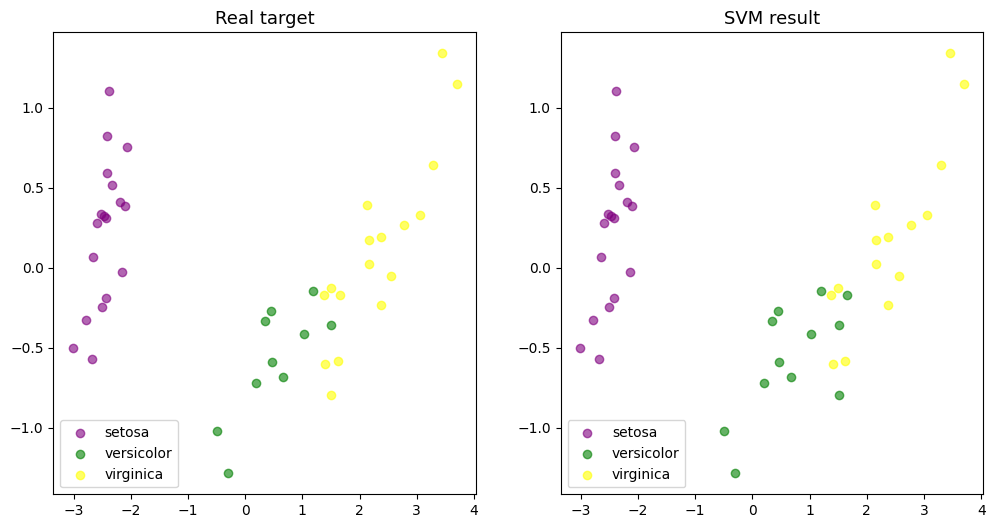

In [41]:
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index
index_2 = y_find[y_find == 2].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index
index_2_p = y_pred_Series[y_pred_Series == 2].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'setosa')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'versicolor')
plt.scatter(X_test_pca[index_2, 0], X_test_pca[index_2, 1], color = 'yellow', alpha = 0.6, label = 'virginica')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'setosa')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'versicolor')
plt.scatter(X_test_pca[index_2_p, 0], X_test_pca[index_2_p, 1], color = 'yellow', alpha = 0.6, label = 'virginica')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

## 실습 : polynomial kernel 로 예측한 결과도 그려보세요.

In [42]:
from sklearn.svm import SVC

In [44]:
clf = SVC(kernel='poly', degree=3, C=1, gamma='scale')
clf.fit(X_train, y_train) #학습
y_pred = clf.predict(X_test) #예측

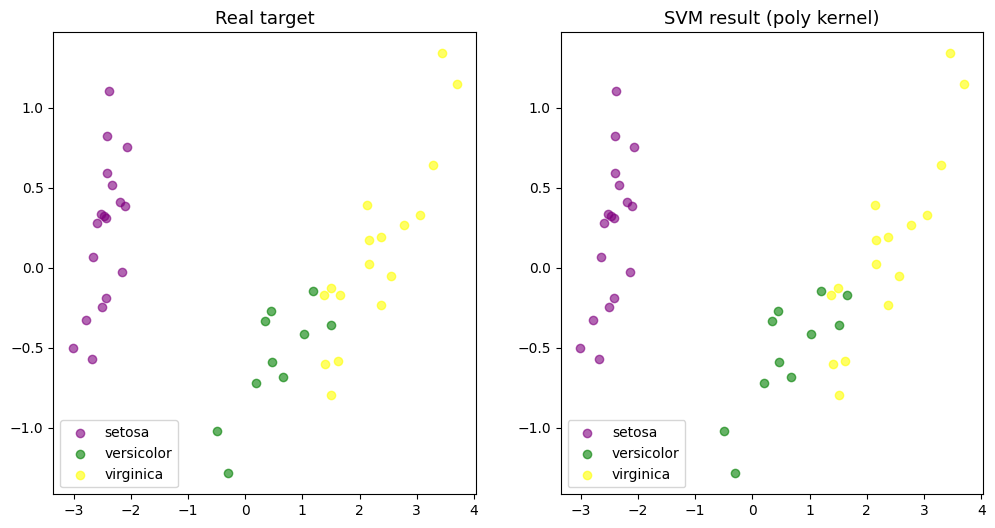

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop=True)

# 실제 라벨 기준 색상 분포
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index
index_2 = y_find[y_find == 2].index

# 예측 라벨 기준 색상 분포
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index
index_2_p = y_pred_Series[y_pred_Series == 2].index

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color='purple', alpha=0.6, label='setosa')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color='green', alpha=0.6, label='versicolor')
plt.scatter(X_test_pca[index_2, 0], X_test_pca[index_2, 1], color='yellow', alpha=0.6, label='virginica')
plt.title('Real target', size=13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color='purple', alpha=0.6, label='setosa')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color='green', alpha=0.6, label='versicolor')
plt.scatter(X_test_pca[index_2_p, 0], X_test_pca[index_2_p, 1], color='yellow', alpha=0.6, label='virginica')
plt.title('SVM result (poly kernel)', size=13)
plt.legend()
plt.show()

## 반달모양 데이터 | 초평면으로 분류(RBF 커널)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

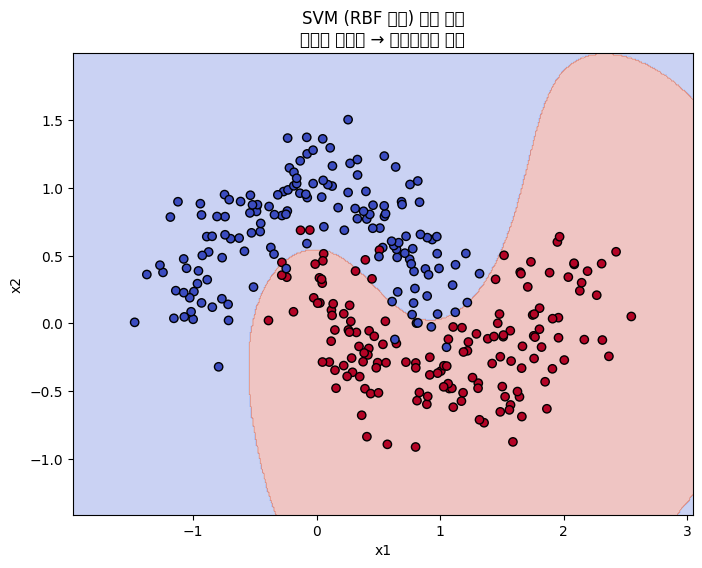

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# 1. 복잡한 데이터 생성 (반달 모양 데이터)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 2. 비선형 SVM 모델 정의 (RBF 커널)
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, y)

# 3. 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM (RBF 커널) 결정 경계\n복잡한 데이터 → 초평면으로 분리")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# 4. 시각화 실행
plot_decision_boundary(clf, X, y)


make_moon()으로 생성된 반달모양 데이터는 linear boundary를 만들 수 없음.
but, SVM + RBF kernel 학습시키면
고차원에서 초평면을 학습시켜 비선형 결정경계를 그릴 수 있음.